In [ ]:
+ stat desc sur la base
+ reg 
+ tests

In [ ]:
stats desc
Regressions sans amenites, methode loyers reels vs loyers imputés -> loyers imputes
Tests

In [123]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [124]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


Statistiques croisées par territoire, sur nos variables dépendantes // checker hypothese de normalité

a commenter ici. log transfo permet d'avoir une var y quasi-normale. distrib normale aussi lorsqu'on croise avec le territoire. territoires 10 et 12 un peu bizarres mais c'est ok (rural et echantillons plus petits, d'ou la shape moins gaussienne)

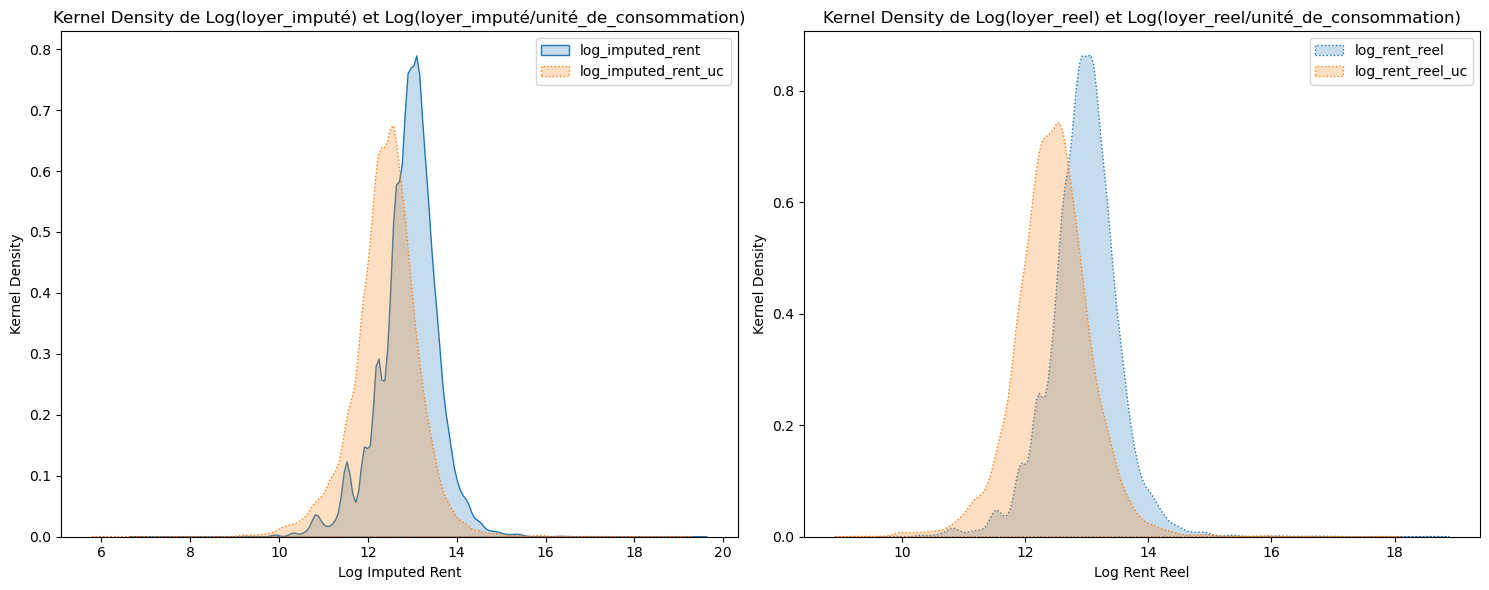

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# configurer le graphique double
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

 # plot 1: 
# tracer la densité de log_imputed_rent
sns.kdeplot(total_dataset_clean['log_imputed_rent'], label='log_imputed_rent', fill=True, ax=axes[0])
# et de la densité de log_imputed_rent_uc
sns.kdeplot(total_dataset_clean['log_imputed_rent_uc'], label='log_imputed_rent_uc', fill=True, linestyle='dotted', ax=axes[0])
# définir les labels des axes et titre
plt.xlabel('Log Imputed Rent')
plt.ylabel('Kernel Density')
plt.title('Kernel Density de Log(loyer_imputé) et Log(loyer_imputé/unité_de_consommation)')

axes[0].set_xlabel('Log Imputed Rent')
axes[0].set_ylabel('Kernel Density')
axes[0].set_title('Kernel Density de Log(loyer_imputé) et Log(loyer_imputé/unité_de_consommation)')
axes[0].legend()

 # plot 2: 
# tracer la densité de log_rent_reel
sns.kdeplot(total_dataset_clean['log_rent_reel'], label='log_rent_reel', fill=True, linestyle='dotted', ax=axes[1])
# et de la densité de log_rent_reel_uc
sns.kdeplot(total_dataset_clean['log_rent_reel_uc'], label='log_rent_reel_uc', fill=True, linestyle='dotted', ax=axes[1])
# définir les labels des axes et titre
axes[1].set_xlabel('Log Rent Reel')
axes[1].set_ylabel('Kernel Density')
axes[1].set_title('Kernel Density de Log(loyer_reel) et Log(loyer_reel/unité_de_consommation)')
axes[1].legend()

plt.tight_layout() # ajuster la mise en page

plt.show() # afficher les graphiques


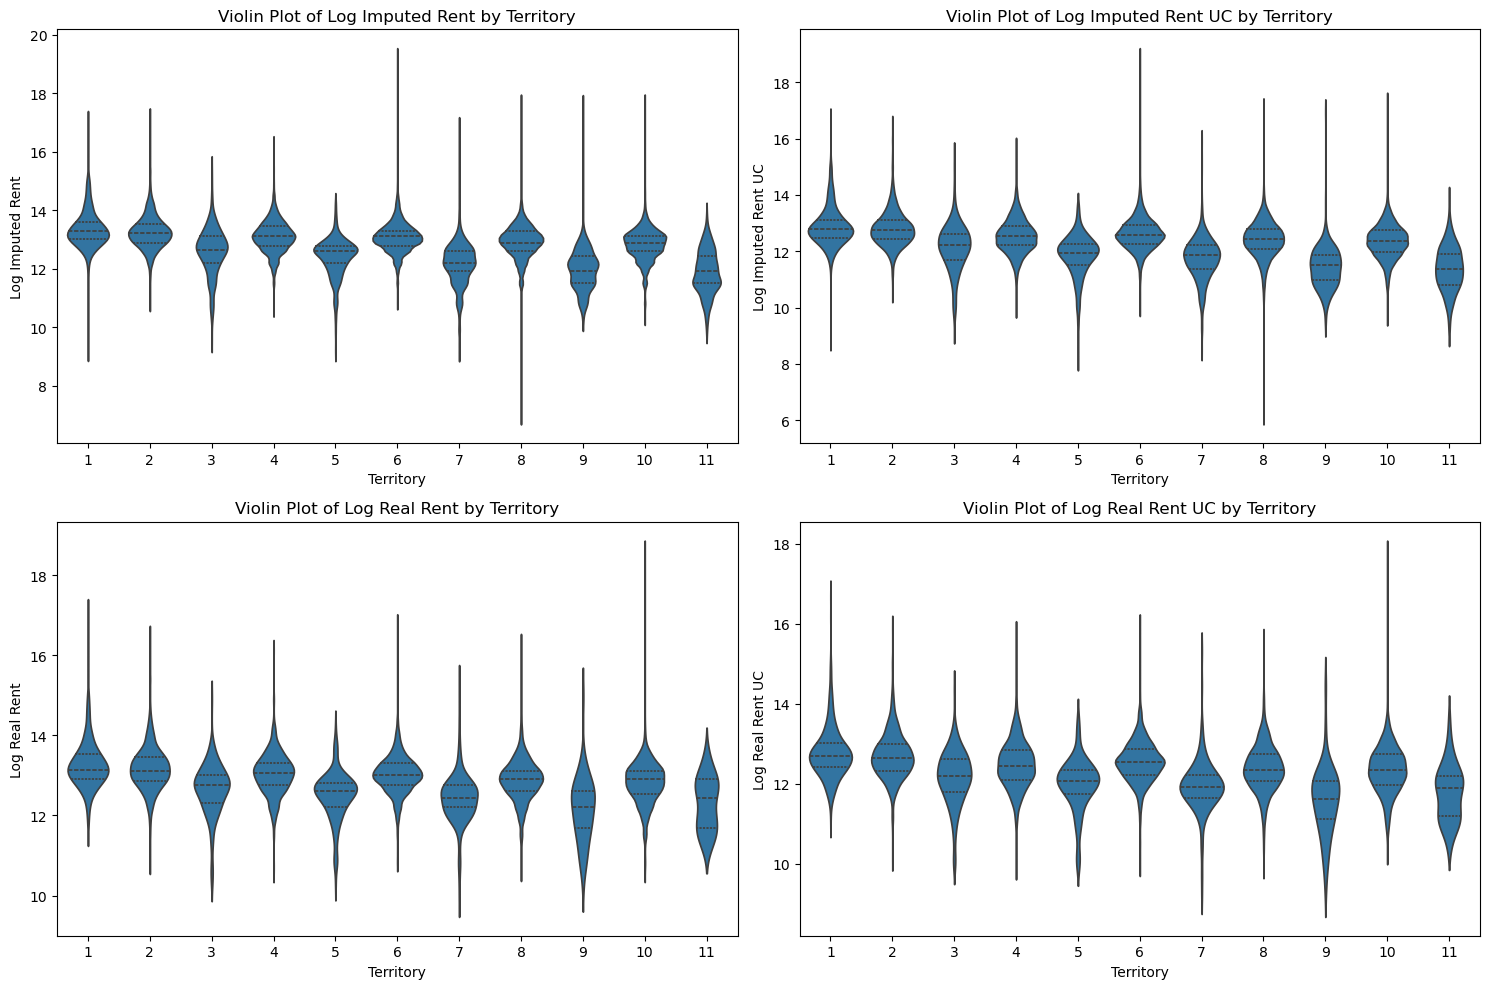

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: Violin plot of log_imputed_rent by territory
sns.violinplot(x='territory', y='log_imputed_rent', data=total_dataset_clean, ax=axes[0, 0], inner="quartile")
axes[0, 0].set_xlabel('Territory')
axes[0, 0].set_ylabel('Log Imputed Rent')
axes[0, 0].set_title('Violin Plot of Log Imputed Rent by Territory')

# Plot 2: Violin plot of log_imputed_rent_uc by territory
sns.violinplot(x='territory', y='log_imputed_rent_uc', data=total_dataset_clean, ax=axes[0, 1], inner="quartile")
axes[0, 1].set_xlabel('Territory')
axes[0, 1].set_ylabel('Log Imputed Rent UC')
axes[0, 1].set_title('Violin Plot of Log Imputed Rent UC by Territory')

# Plot 3: Violin plot of log_rent_reel by territory
sns.violinplot(x='territory', y='log_rent_reel', data=total_dataset_clean, ax=axes[1, 0], inner="quartile")
axes[1, 0].set_xlabel('Territory')
axes[1, 0].set_ylabel('Log Real Rent')
axes[1, 0].set_title('Violin Plot of Log Real Rent by Territory')

# Plot 4: Violin plot of log_rent_reel_uc by territory
sns.violinplot(x='territory', y='log_rent_reel_uc', data=total_dataset_clean, ax=axes[1, 1], inner="quartile")
axes[1, 1].set_xlabel('Territory')
axes[1, 1].set_ylabel('Log Real Rent UC')
axes[1, 1].set_title('Violin Plot of Log Real Rent UC by Territory')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Statistiques croisées par territoire, sur nos variables de contrôles // checker randomisation

Pour celles de Utilrank, voir dans 4_outputs

à commenter : age est uniforme. les vars educ et marital_status: pour chaque territoire, on a une distribution similaire - evidemment les hauteurs des histogrammes sont differents selon les territoires, car y a des categories de territoires plus populees que d'autres dans la base // pour l'age, chaque territoire est balancé entre male et femme (a part territoire 10, mais c'est ok c'est un territoire plus petit en terme d'echantillon + rural)

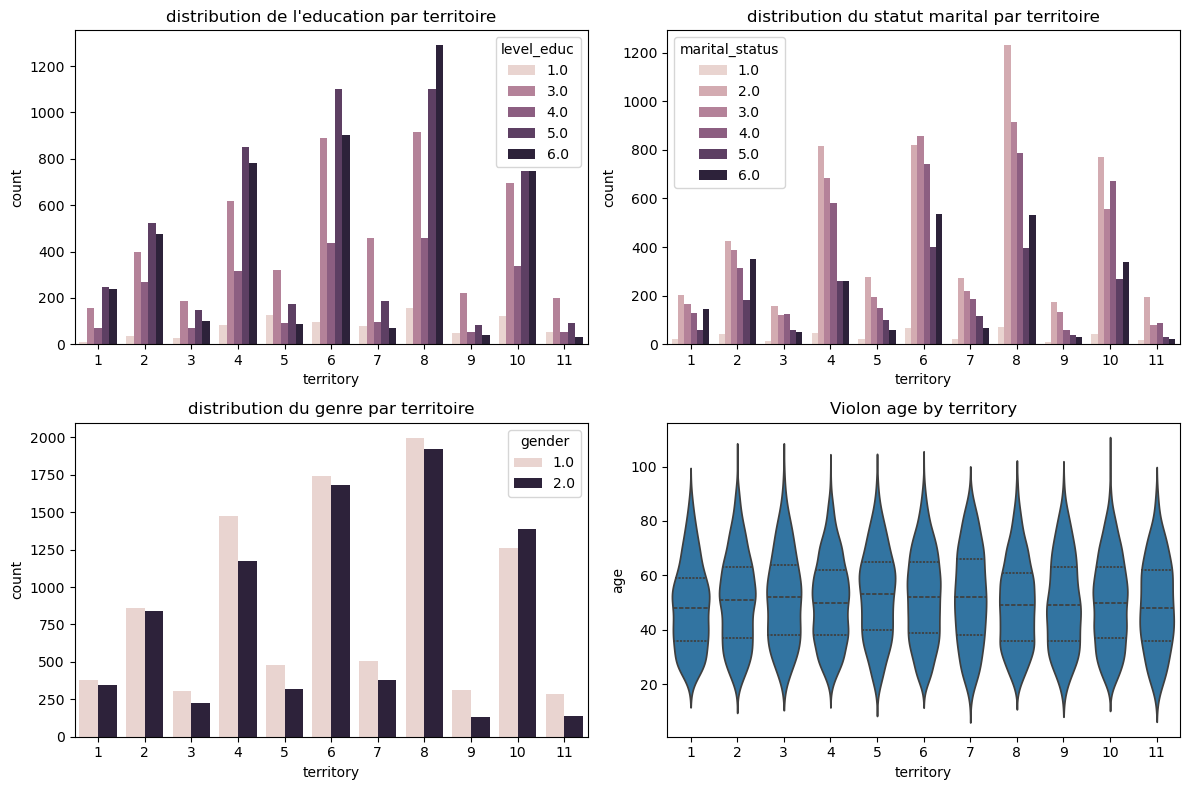

In [128]:
### Quelques stat desc

import seaborn as sns
import matplotlib.pyplot as plt

# pavage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# graphique 1 : distribution de l'éducation par territoire
sns.countplot(x='territory', hue='level_educ', data=total_dataset_clean, ax=axes[0, 0])
axes[0, 0].set_title('distribution de l\'education par territoire')

# graphique 2 : distribution du statut marital par territoire
sns.countplot(x='territory', hue='marital_status', data=total_dataset_clean, ax=axes[0, 1])
axes[0, 1].set_title('distribution du statut marital par territoire')

# graphique 3 : distribution du genre par territoire
sns.countplot(x='territory', hue='gender', data=total_dataset_clean, ax=axes[1, 0])
axes[1, 0].set_title('distribution du genre par territoire')

# graphique 4 : distribution de l'âge par territoire
#sns.histplot(x='age', hue='territory', data=total_dataset_clean, kde=False, ax=axes[1, 1])
#axes[1, 1].set_title('distribution de l\'age par territoire')

sns.violinplot(x='territory', y='age', data=total_dataset_clean, inner="quartile", ax=axes[1, 1])
axes[1, 1].set_xlabel('territory')
axes[1, 1].set_ylabel('age')
axes[1, 1].set_title('Violon age by territory')
    # loi uniforme sur l'age, ok 

# ajuster la mise en page
plt.tight_layout()

# afficher les graphiques
plt.show()

In [ ]:
preparation des regression et regressions

In [ ]:
carac socio (au dessus) // prix logement (numrooms voir 3_complements) // basic amenities Utilrank

methode A, petit mot sur les loyers reels -- mortgagepayment
methode B

In [135]:

y_method_A_reg1 = total_dataset_clean[['log_rent_reel','log_rent_reel_uc']]
X_reg_sans_amenite_sans_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender']]

data_A_reg1 = pd.concat([X_reg_sans_amenite_sans_ownership, y_method_A_reg1], axis=1).dropna()
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3.0,2,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3.0,2,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3.0,2,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3.0,2,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3.0,2,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
18017,4.0,1.0,7,6.0,36.0,3.0,1.0,12.765688,11.960969
18019,3.0,1.0,7,5.0,33.0,4.0,2.0,12.206073,11.656767
18062,2.0,1.0,11,5.0,20.0,2.0,2.0,11.156251,10.463103
18123,3.0,1.0,3,5.0,36.0,3.0,1.0,12.611538,12.062232


In [136]:
data_A_reg1['Utilrank'] = data_A_reg1['Utilrank'].astype(int)
data_A_reg1['territory'] = data_A_reg1['territory'].astype(int)

In [137]:
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3,2,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3,2,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3,2,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3,2,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3,2,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
18017,4.0,1,7,6.0,36.0,3.0,1.0,12.765688,11.960969
18019,3.0,1,7,5.0,33.0,4.0,2.0,12.206073,11.656767
18062,2.0,1,11,5.0,20.0,2.0,2.0,11.156251,10.463103
18123,3.0,1,3,5.0,36.0,3.0,1.0,12.611538,12.062232


In [140]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# regression
mod = smf.ols(formula='log_rent_reel ~ C(territory)+ Numrooms + C(Utilrank) + level_educ + age + marital_status + gender', data=data_A_reg1)
res = mod.fit()

# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender'])
display(summary_table)

,OLS
Numrooms,0.1864***
,(0.0046)
level_educ,0.0770***
,(0.0044)
age,0.0029***
,(0.0004)
marital_status,-0.0105***
,(0.0033)
gender,-0.0160*
,(0.0095)


In [141]:
mod = smf.ols(formula='log_rent_reel ~C(territory)+ Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.9895,0.038,312.234,0.000,11.914,12.065
C(territory)[T.2],-0.1751,0.024,-7.449,0.000,-0.221,-0.129
C(territory)[T.3],-0.5489,0.035,-15.841,0.000,-0.617,-0.481
C(territory)[T.4],-0.2415,0.023,-10.506,0.000,-0.287,-0.196
C(territory)[T.5],-0.6786,0.036,-18.835,0.000,-0.749,-0.608
C(territory)[T.6],-0.2897,0.022,-13.328,0.000,-0.332,-0.247
C(territory)[T.7],-0.6450,0.035,-18.373,0.000,-0.714,-0.576
C(territory)[T.8],-0.3483,0.022,-15.991,0.000,-0.391,-0.306
C(territory)[T.9],-0.8487,0.055,-15.413,0.000,-0.957,-0.741
C(territory)[T.10],-0.3866,0.023,-16.829,0.000,-0.432,-0.342


In [142]:
#reduction des coefficients avec unite de consommation (composition du menage)
#on veut reduire l'effet taille des menages 
#le coeff de gender devient significatif, lorsqu'on ajoute la composition des menages (unite de conso)

mod = smf.ols(formula='log_rent_reel_uc ~ C(territory)+Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.3313,0.043,261.534,0.000,11.246,11.416
C(territory)[T.2],-0.1182,0.027,-4.455,0.000,-0.170,-0.066
C(territory)[T.3],-0.4593,0.039,-11.746,0.000,-0.536,-0.383
C(territory)[T.4],-0.2434,0.026,-9.386,0.000,-0.294,-0.193
C(territory)[T.5],-0.5555,0.041,-13.664,0.000,-0.635,-0.476
C(territory)[T.6],-0.2337,0.025,-9.529,0.000,-0.282,-0.186
C(territory)[T.7],-0.5346,0.040,-13.495,0.000,-0.612,-0.457
C(territory)[T.8],-0.3045,0.025,-12.388,0.000,-0.353,-0.256
C(territory)[T.9],-0.8152,0.062,-13.121,0.000,-0.937,-0.693
C(territory)[T.10],-0.2967,0.026,-11.447,0.000,-0.348,-0.246


donc on maintient seulement par unite de consommation a partir de maintenant : 

In [ ]:
#loyers imputes, uc (reg 1)
    # plus populee (en y)
    # une variable explicative supplementaire (own_status)
    # meilleur R2
    # les coefficients et les p-valeurs restent coherents

# donc on garde methode B avec loyers imputes 
# on conduit quelques tests, et on voit si on garde ce modele de regression

# ensuite, on ajoute les amenites (reg 2), et on compare avec cette reg (reg 1) 

In [143]:

y_method_B_reg1 = total_dataset_clean[['log_imputed_rent','log_imputed_rent_uc']]
X_reg_sans_amenite_avec_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender', 'own_status']]

data_B_reg1 = pd.concat([X_reg_sans_amenite_avec_ownership, y_method_B_reg1], axis=1).dropna()
data_B_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,own_status,log_imputed_rent,log_imputed_rent_uc
0,4.0,3.0,2,5.0,58.0,3.0,1.0,0,13.592367,13.245793
1,6.0,3.0,2,5.0,42.0,2.0,1.0,0,13.527828,12.554873
2,4.0,3.0,2,5.0,44.0,6.0,2.0,0,13.458836,13.112262
3,4.0,3.0,2,5.0,49.0,2.0,1.0,0,13.527828,12.978522
4,4.0,3.0,2,6.0,35.0,4.0,2.0,0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...,...
18134,2.0,1.0,7,3.0,56.0,4.0,2.0,0,12.206073,12.206073
18135,2.0,1.0,7,4.0,40.0,4.0,2.0,1,12.429216,11.879910
18136,4.0,9.0,7,3.0,60.0,2.0,1.0,1,11.289782,10.596635
18137,3.0,1.0,7,3.0,26.0,2.0,1.0,1,11.918391,11.571817


In [145]:
# reg
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory)+Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender+own_status', data=data_B_reg1)
res = mod.fit()

# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,0.0741***
,(0.0038)
level_educ,0.1095***
,(0.0034)
age,0.0070***
,(0.0003)
marital_status,0.0634***
,(0.0030)
gender,-0.0295***
,(0.0081)


In [146]:
data_B_reg1['Utilrank'] = data_B_reg1['Utilrank'].astype(int)
data_B_reg1['territory'] = data_B_reg1['territory'].astype(int)
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory)+ Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender+own_status', data=data_B_reg1)
res = mod.fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.1985,0.033,340.320,0.000,11.134,11.263
C(territory)[T.2],-0.0996,0.023,-4.377,0.000,-0.144,-0.055
C(territory)[T.3],-0.4959,0.029,-16.822,0.000,-0.554,-0.438
C(territory)[T.4],-0.2503,0.022,-11.561,0.000,-0.293,-0.208
C(territory)[T.5],-0.6293,0.027,-22.932,0.000,-0.683,-0.576
C(territory)[T.6],-0.2523,0.021,-11.997,0.000,-0.293,-0.211
C(territory)[T.7],-0.7304,0.026,-28.107,0.000,-0.781,-0.679
C(territory)[T.8],-0.3387,0.021,-16.190,0.000,-0.380,-0.298
C(territory)[T.9],-0.9109,0.033,-27.636,0.000,-0.975,-0.846
C(territory)[T.10],-0.3325,0.022,-15.272,0.000,-0.375,-0.290


In [ ]:
# tests : 

In [147]:
# test de multicollinearite 

# d'apres la note [2] au dessus, il semble 
X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

# pas de multicollinearite (VIF de toutes les vars < 10)
# le VIF fort sur l'intercept n'est pas important. en effet, l'intercept est naturellement sensible a des changements de points dans le nuage de donnees, pour fitter la droite de regression
# dans notre cas, on ne s'occupe pas de la sensitivite de l'intercept y. Sinon, on devrait centrer les valeurs de x 

,Variable,VIF
0,Intercept,77.309833
1,C(territory)[T.2],3.179006
2,C(territory)[T.3],1.739778
3,C(territory)[T.4],4.159853
4,C(territory)[T.5],2.063792
5,C(territory)[T.6],4.854788
6,C(territory)[T.7],2.334222
7,C(territory)[T.8],5.264521
8,C(territory)[T.9],1.662601
9,C(territory)[T.10],4.324446


In [148]:
vif['VIF'].mean() #vif moyen <10 meme avec vif de l'intercept

5.402300205567666

In [149]:
vif.drop(index=vif.index[0], axis=0, inplace=True)
vif

,Variable,VIF
1,C(territory)[T.2],3.179006
2,C(territory)[T.3],1.739778
3,C(territory)[T.4],4.159853
4,C(territory)[T.5],2.063792
5,C(territory)[T.6],4.854788
6,C(territory)[T.7],2.334222
7,C(territory)[T.8],5.264521
8,C(territory)[T.9],1.662601
9,C(territory)[T.10],4.324446
10,C(territory)[T.11],1.702141


In [150]:
vif['VIF'].mean() #vif moyen <10 tres faible, sans intercept

2.133775967947978

In [151]:
# heteroskedasticity test

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

# p-valeur proche de 0 : on rejete Ho 
# Ho est l'hypothese de variance constante  
# donc on est en presence d'heteroskedasticite, il faut utiliser des robust standard error

White Test for Heteroskedasticity:
Test Statistic: 581.691532561436
P-Value: 2.540070580926755e-43
F-Statistic: 3.2731983222067123
F-Test P-Value: 2.3273568179941033e-44


In [152]:
# test pour outliers 
import matplotlib.pyplot as plt

studentized_residuals = res.get_influence().resid_studentized_internal


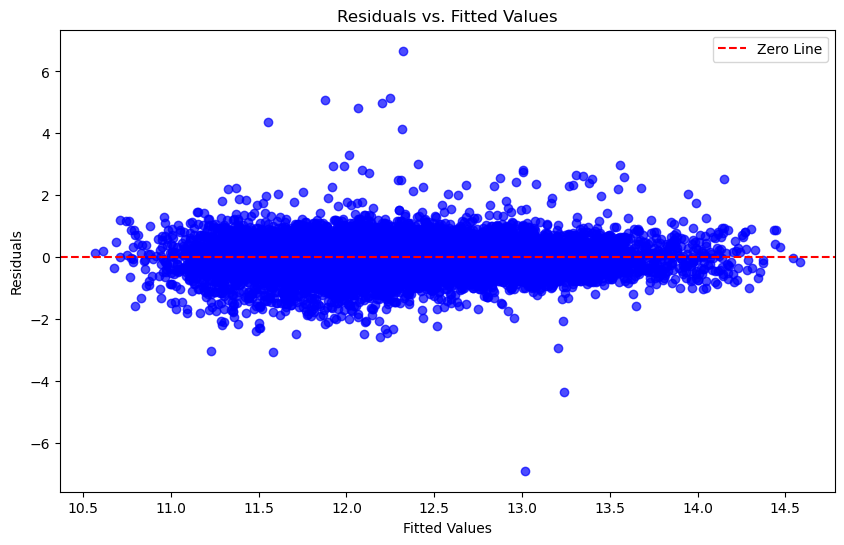

In [153]:
#rvf plot

# valeurs fittees + residus
fitted_values = res.fittedvalues
residuals = res.resid

# rvf plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
heteroskedasticite illustree ici 
pas trop d'outliers genants, on garde les data pour garder une base de donnees la plus exhaustive possible

In [154]:
results = mod.fit(cov_type='HC0')
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.1985,0.034,329.888,0.000,11.132,11.265
C(territory)[T.2],-0.0996,0.022,-4.494,0.000,-0.143,-0.056
C(territory)[T.3],-0.4959,0.036,-13.593,0.000,-0.567,-0.424
C(territory)[T.4],-0.2503,0.021,-11.702,0.000,-0.292,-0.208
C(territory)[T.5],-0.6293,0.030,-21.323,0.000,-0.687,-0.571
C(territory)[T.6],-0.2523,0.021,-12.151,0.000,-0.293,-0.212
C(territory)[T.7],-0.7304,0.031,-23.874,0.000,-0.790,-0.670
C(territory)[T.8],-0.3387,0.021,-15.972,0.000,-0.380,-0.297
C(territory)[T.9],-0.9109,0.040,-22.621,0.000,-0.990,-0.832
C(territory)[T.10],-0.3325,0.022,-15.396,0.000,-0.375,-0.290


In [156]:
summary_table = summary_col([results], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,0.0741***
,(0.0040)
level_educ,0.1095***
,(0.0036)
age,0.0070***
,(0.0003)
marital_status,0.0634***
,(0.0030)
gender,-0.0295***
,(0.0082)


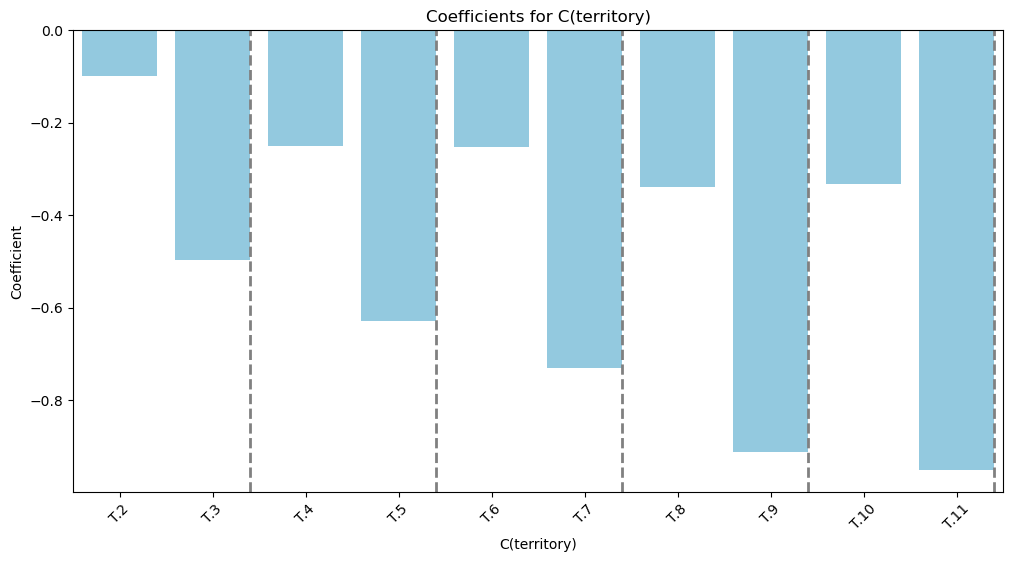

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and territory categories from the summary table
coefficients = results.params.loc['C(territory)[T.2]': 'C(territory)[T.11]']
territories = [f'T.{i}' for i in range(2, 12)]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=territories, y=coefficients, color='skyblue')

# Add a separating line after every odd index
for i, bar in enumerate(ax.patches):
    if i % 2 != 0:
        ax.axvline(x=bar.get_x() + bar.get_width(), color='gray', linestyle='--', linewidth=2.0)

plt.title('Coefficients for C(territory)')
plt.xlabel('C(territory)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()